# Movie Review Analysis (Natural Language Processing)

###### The focus of the project is to perform sentiment analysis on IMBD movie dataset obtained from kaggle. Sentimental analysis is a concept the focuses on analysis by extracting the emotions, opinions of people towards a particular topic from a structured, semi-structured or unstructured textual data. The main objective is to examine the polarity of the review of the movie whether its negative review or positive review using natural language processing techniques. In this project we aim to use Sentiment Analysis on a set of movie reviews given by reviewers and try to understand what their overall reaction to the movie was, i.e. if they liked the movie or they hated it. Also trying to compare how gaussian naïve bayes, multinomial naïve bayes, logistic regression, ada boost classifier, random forest tree and support vector machine algorithms can categorize the polarity correctly. Identifying the model with the best accuracy for perfect prediction of the data reviews.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as  np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import re
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
review=pd.read_csv("C:\\Users\\maria\\Desktop\\MovieReview\\imdb_master.csv",encoding="latin-1")

In [3]:
review_pos=review[review['label']=="pos"]
review_neg=review[review['label']=="neg"]

In [4]:
review_pos=review_pos[:1000]
review_neg=review_neg[:1000]

In [5]:
review_pos

,Unnamed: 0,type,review,label,file
12500,12500,test,I went and saw this movie last night after bei...,pos,0_10.txt
12501,12501,test,Actor turned director Bill Paxton follows up h...,pos,10000_7.txt
12502,12502,test,As a recreational golfer with some knowledge o...,pos,10001_9.txt
12503,12503,test,"I saw this film in a sneak preview, and it is ...",pos,10002_8.txt
12504,12504,test,Bill Paxton has taken the true story of the 19...,pos,10003_8.txt
...,...,...,...,...,...
13495,13495,test,GoldenEye is a masterpiece. The storyline is a...,pos,10897_10.txt
13496,13496,test,This episode introduces us to the formal dress...,pos,10898_7.txt
13497,13497,test,"""Lonely among us"" definitely is one of the bes...",pos,10899_8.txt
13498,13498,test,I love the way he experiments. Ab Tak Chappan ...,pos,1089_10.txt


In [6]:
review_neg

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt
...,...,...,...,...,...
995,995,test,"A young woman, Nicole Carrow (Jaimie Alexander...",neg,10897_4.txt
996,996,test,"I've never made one of these before, but this ...",neg,10898_2.txt
997,997,test,"If you just want gore, and nothing but gore an...",neg,10899_1.txt
998,998,test,"We have given this film one star for awful, ho...",neg,1089_1.txt


In [7]:
review=review_pos.append(review_neg,ignore_index=True)

In [8]:
review

,Unnamed: 0,type,review,label,file
0,12500,test,I went and saw this movie last night after bei...,pos,0_10.txt
1,12501,test,Actor turned director Bill Paxton follows up h...,pos,10000_7.txt
2,12502,test,As a recreational golfer with some knowledge o...,pos,10001_9.txt
3,12503,test,"I saw this film in a sneak preview, and it is ...",pos,10002_8.txt
4,12504,test,Bill Paxton has taken the true story of the 19...,pos,10003_8.txt
...,...,...,...,...,...
1995,995,test,"A young woman, Nicole Carrow (Jaimie Alexander...",neg,10897_4.txt
1996,996,test,"I've never made one of these before, but this ...",neg,10898_2.txt
1997,997,test,"If you just want gore, and nothing but gore an...",neg,10899_1.txt
1998,998,test,"We have given this film one star for awful, ho...",neg,1089_1.txt


## Count of Positive and Negative Comments

In [9]:
review=review.drop(['Unnamed: 0','type','file'],axis=1)

print("Positive - ",sum(review['label']=='pos'))
print("Negative - ",sum(review['label']=='neg'))

Positive -  1000
Negative -  1000


## Label Encoding

In [10]:
review['label']=review['label'].map({'neg':0,'pos':1})
review['review']=review['review'].str.lower()

count=-1
for s in review['review']:
    s=re.sub("<.*?>","",s)
    count=count+1
    review['review'].iloc[count]=s
    


C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
review['review'].head()

0    i went and saw this movie last night after bei...
1    actor turned director bill paxton follows up h...
2    as a recreational golfer with some knowledge o...
3    i saw this film in a sneak preview, and it is ...
4    bill paxton has taken the true story of the 19...
Name: review, dtype: object

## Contraction of words

In [12]:

contractions_dict = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"could'nt":"could not",
"couldn't've": "could not have",
"didn't": "did not",
"did'nt":"did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [13]:

contractions_re=re.compile('(%s)'%'|'.join(contractions_dict.keys()))
def expand_contractions(s,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace,s)

## Expanding Contractions

In [14]:
review

,review,label
0,i went and saw this movie last night after bei...,1
1,actor turned director bill paxton follows up h...,1
2,as a recreational golfer with some knowledge o...,1
3,"i saw this film in a sneak preview, and it is ...",1
4,bill paxton has taken the true story of the 19...,1
...,...,...
1995,"a young woman, nicole carrow (jaimie alexander...",0
1996,"i've never made one of these before, but this ...",0
1997,"if you just want gore, and nothing but gore an...",0
1998,"we have given this film one star for awful, ho...",0


In [15]:
for i in range(0,2000):
    review.review.loc[i]=expand_contractions(review.review.loc[i])

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
review['review'][2]

'as a recreational golfer with some knowledge of the sport\'s history, i was pleased with disney\'s sensitivity to the issues of class in golf in the early twentieth century. the movie depicted well the psychological battles that harry vardon fought within himself, from his childhood trauma of being evicted to his own inability to break that glass ceiling that prevents him from being accepted as an equal in english golf society. likewise, the young ouimet goes through his own class struggles, being a mere caddie in the eyes of the upper crust americans who scoff at his attempts to rise above his standing. what i loved best, however, is how this theme of class is manifested in the characters of ouimet\'s parents. his father is a working-class drone who sees the value of hard work but is intimidated by the upper class; his mother, however, recognizes her son\'s talent and desire and encourages him to pursue his dream of competing against those who think he is inferior.finally, the golf s

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:

count=-1
stop_words=set(stopwords.words('english'))
for s in review['review']:
    count=count+1
    s=[word for word in s.split() if (word not in stop_words and word.isalpha())]
    s=' '.join(s)
    review['review'].iloc[count]=s
    

In [19]:
review.head()

,review,label
0,went saw movie last night coaxed friends admit...,1
1,actor turned director bill paxton follows prom...,1
2,recreational golfer knowledge pleased sensitiv...,1
3,saw film sneak cinematography unusually acting...,1
4,bill paxton taken true story us golf open made...,1


In [20]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Word Tokenization and Stemming

In [21]:
count=-1
stem=[]
lemma=WordNetLemmatizer()
stemmer=SnowballStemmer('english')
for s in review['review']:
    count=count+1
    word_token=word_tokenize(s)
    for word in word_token:
        stem.append(stemmer.stem(lemma.lemmatize(word)))
    s=' '.join(stem)
    review['review'].iloc[count]=s
    stem=[]

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


## Creating a Bag of Words

In [22]:

#Bag of Words
vect=CountVectorizer()
bow=vect.fit_transform(review.review)
bow=pd.DataFrame(bow.toarray(),columns=list(vect.get_feature_names()))
bow.shape
xtrbow,xtebow,ytrbow,ytebow=train_test_split(bow,review.label,test_size=0.20)


## Classification Models Used


 GaussianNB()
Mean accuracy for training set -  0.8074999999999999
Standard deviation of accuracy -  0.030336652748779
Accuracy of test data -  0.815

 MultinomialNB()
Mean accuracy for training set -  0.8993749999999998
Standard deviation of accuracy -  0.014306903927824494
Accuracy of test data -  0.8825

 LogisticRegression()
Mean accuracy for training set -  0.865
Standard deviation of accuracy -  0.021776564237730424
Accuracy of test data -  0.8875

 RandomForestClassifier()
Mean accuracy for training set -  0.8331249999999999
Standard deviation of accuracy -  0.01763341997458233
Accuracy of test data -  0.8475

 AdaBoostClassifier()
Mean accuracy for training set -  0.78125
Standard deviation of accuracy -  0.026663411259626936
Accuracy of test data -  0.7825


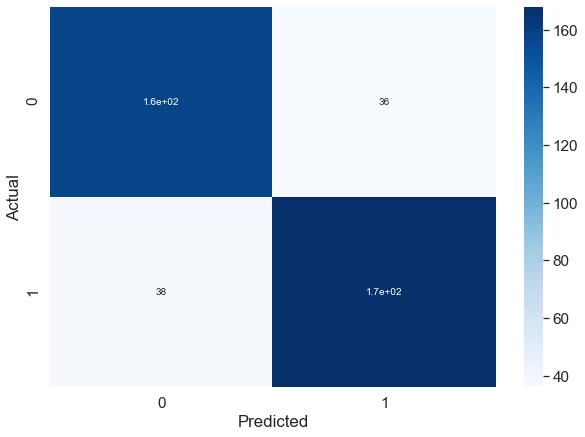

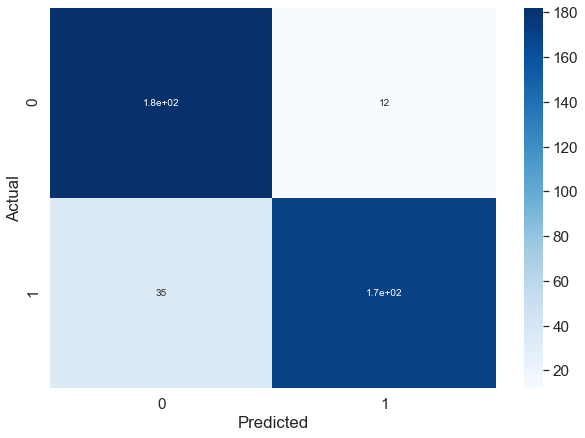

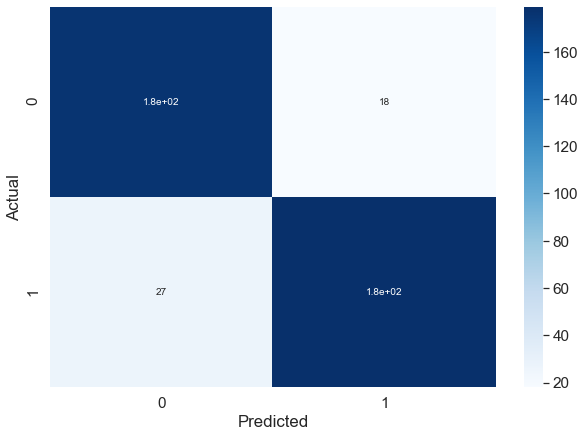

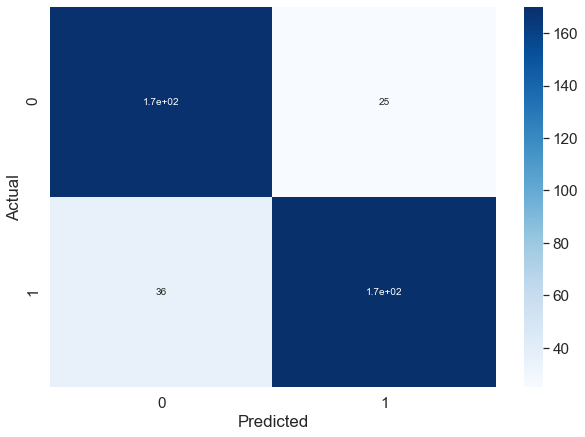

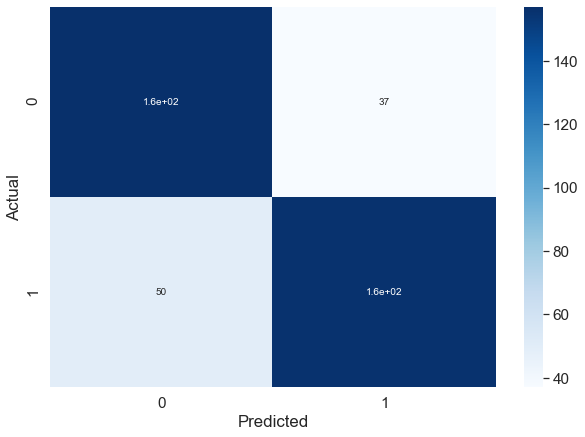

In [23]:

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

models=[GaussianNB(),MultinomialNB(),LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier()]

from sklearn.metrics import confusion_matrix

for model in models:
    score=cross_val_score(model,xtrbow,ytrbow,cv=5)
    print('\n',model)
    print('Mean accuracy for training set - ',score.mean())
    print('Standard deviation of accuracy - ',score.std())
    model.fit(xtrbow,ytrbow)
    pred=model.predict(xtebow)
    print("Accuracy of test data - ",accuracy_score(ytebow,pred))
    data=confusion_matrix(ytebow,pred)
    df_cm=pd.DataFrame(data,columns=np.unique(ytebow),index=np.unique(ytebow))
    df_cm.index.name="Actual"
    df_cm.columns.name="Predicted"
    plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm,cmap="Blues",annot=True,annot_kws={"size":10})


SVM
Accuracy score of test -  0.8575


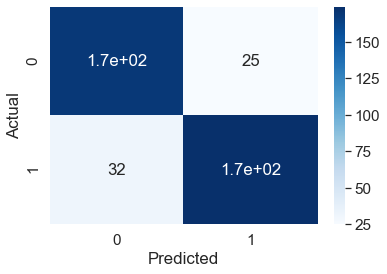

In [24]:

print("\nSVM")
model=svm.SVC(kernel='linear',class_weight={0:0.60,1:0.40})
model.fit(xtrbow,ytrbow)
pred=model.predict(xtebow)
print("Accuracy score of test - ",accuracy_score(ytebow,pred))

df_cm=pd.DataFrame(confusion_matrix(ytebow,pred),columns=np.unique(ytebow),index=np.unique(ytebow))
df_cm.index.name="Actual"
df_cm.columns.name="Predicted"
import seaborn as sn
sn.heatmap(df_cm,cmap="Blues",annot=True)
